In [111]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set(style="darkgrid")

In [112]:
path = "Despesas_Cefisma_set2016.xls"

In [113]:
raw = pd.read_excel(path, sheetname=None)
new_raw = {'nome': [], 'valor':[], 'data': [], 'tipo':[]}

In [114]:
for k in raw.keys():
    temp_raw = raw[k]
    for t in temp_raw.iterrows():
        t = t[1]
        datetim = t.Data
        new_raw['data'].append(datetim)
        new_raw['nome'].append(t.Nome)
        sign = 0
        if t["Débito/Crédito"] == "Débito":
            sign = -1
        else:
            sign = 1
        valor = t.Valor * sign
        new_raw['valor'].append(valor)
        new_raw['tipo'].append(k)
new_raw = pd.DataFrame(new_raw)

In [116]:
new_raw = new_raw.sort_values("data")
new_raw.to_csv("cefisma.csv", index=False)


In [130]:
dat = pd.read_csv("cefisma.csv", parse_dates=["data"])

In [69]:
per = pd.Period("2015-1", freq="D")

In [193]:
periods = pd.date_range("2015-02", "2016-09", freq="M")

In [194]:
n = len(periods)
receitas = np.zeros(n)
despesas = np.zeros(n)
balanco = np.zeros(n)
periodo = []
i = 0

for p in periods:
    datp = dat[(p-1 < dat.data) & (dat.data < p)]
    receitas[i] = np.sum(datp[datp.valor >= 0].valor)
    despesas[i] = np.sum(datp[datp.valor < 0].valor)
    balanco[i] = np.sum(datp.valor)
    periodo.append(p)
    i += 1

<IPython.core.display.Javascript object>


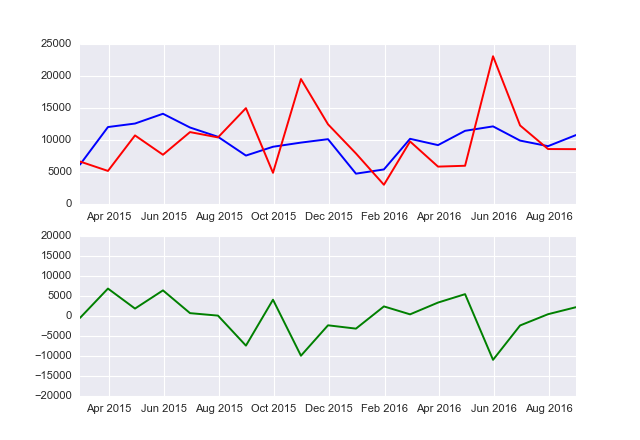

In [195]:
plt.subplot("211")
plt.plot(periodo, receitas, 'b-')
plt.plot(periodo, -despesas, 'r-')
plt.subplot("212")
plt.plot(periodo, balanco, 'g-')
plt.ylim((-2e4, 2e4))
plt.show()

In [213]:
tipos = np.unique(dat.tipo)
receita_total = np.sum(dat[dat.valor > 0].valor)
despesa_total = np.sum(dat[dat.valor < 0].valor)

receita_soma = {"tipo":[], "valor":[], "fracao":[]}
despesa_soma = {"tipo":[], "valor":[], "fracao":[]}

def appendal(dic, tipo, valor, fracao):
    dic["tipo"].append(tipo)
    dic["valor"].append(valor)
    dic["fracao"].append(fracao)

for tipo in tipos:
    dat_tipo = dat[dat.tipo == tipo]
    valor = np.sum(dat_tipo.valor)
    porcentagem = 0
    if valor > 0:
        porcentagem = valor / receita_total
        appendal(receita_soma, tipo, valor, porcentagem)
    else:
        porcentagem = valor / despesa_total
        appendal(despesa_soma, tipo, valor, porcentagem)

In [235]:
plt.pie(receita_soma["fracao"], labels=receita_soma["tipo"], shadow=True,
        autopct="%1.1f%%")
plt.show()


<IPython.core.display.Javascript object>


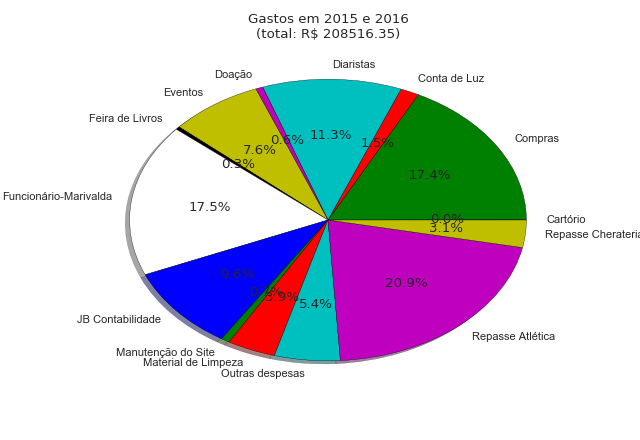

In [248]:
plt.title("Gastos em 2015 e 2016\n(total: R$ %.2f)" % -despesa_total)
plt.pie(despesa_soma["fracao"], labels=despesa_soma["tipo"], shadow=True,
        autopct="%1.1f%%")
plt.show()